<a href="https://colab.research.google.com/github/sagarbhadra7/Python-Programs/blob/master/RF_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

In [0]:
#step 1:Check missing values
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")
data=pd.concat([train,test],axis='rows')
y=train['Loan_Status']

In [175]:
train.shape

(614, 13)

In [176]:
test.shape

(367, 12)

In [177]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Number of Missing Values in data

In [0]:
data_Missing=data.isnull().sum()

In [179]:
data_Missing

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

# Imputing Missing Values

In [0]:
Gender_data_count=data['Gender'].value_counts()

In [181]:
Gender_data_count

Male      775
Female    182
Name: Gender, dtype: int64

Fill accoring to maximum frequency rule

In [0]:
data['Gender'].fillna('Male',inplace=True)

In [183]:
data['Gender'].isnull().sum()

0

In [0]:
Married_data_count=data['Married'].value_counts()

In [185]:
Married_data_count

Yes    631
No     347
Name: Married, dtype: int64

In [0]:
data['Married'].fillna('Yes',inplace=True)

In [187]:
data['Married'].isnull().sum()

0

In [0]:
Self_Emp_count=data['Self_Employed'].value_counts()

In [189]:
Self_Emp_count

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [0]:
data['Self_Employed'].fillna('No',inplace=True)

In [191]:
data['Self_Employed'].isnull().sum()

0

In [0]:
Dependent_counts=data['Dependents'].value_counts()

In [193]:
Dependent_counts

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [0]:
data['Dependents'].fillna('0',inplace=True)

In [0]:
Dependent_counts=data['Dependents'].value_counts()

In [196]:
Dependent_counts

0     570
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [197]:
data['Dependents'].isnull().sum()

0

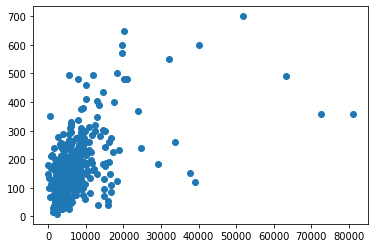

In [198]:
plt.scatter(data['ApplicantIncome'],data['LoanAmount'])

In [0]:
data['LoanAmount'].fillna(data.LoanAmount.mean(),inplace=True)

In [200]:
data['LoanAmount'].isnull().sum()

0

In [201]:
data.Loan_Amount_Term.dtype

dtype('float64')

In [202]:
data.Loan_Amount_Term.head()

0    360.0
1    360.0
2    360.0
3    360.0
4    360.0
Name: Loan_Amount_Term, dtype: float64

In [203]:
data.Loan_Amount_Term.value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [0]:
data['Loan_Amount_Term'].fillna(360.0,inplace=True)

In [205]:
data['Loan_Amount_Term'].isnull().any()

False

In [206]:
data.Credit_History.dtype

dtype('float64')

In [207]:
data['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [0]:
data['Credit_History'].fillna(1.0,inplace=True)

In [209]:
data.Credit_History.isnull().any()

False

In [210]:
data.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

This null of Loan_Status are from test set so this are not filled

In [0]:
bin_size=np.sqrt(len(data))

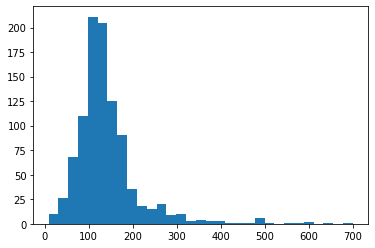

In [212]:
plt.hist(data['LoanAmount'],bins= int(bin_size))
plt.show()

In [213]:
print(data.LoanAmount.mean())
print(data.LoanAmount.median())
print(data.LoanAmount.mode())


142.51153039832283
128.0
0    120.0
dtype: float64


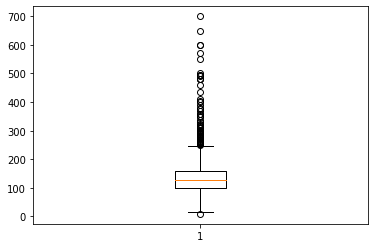

In [214]:
plt.boxplot(data['LoanAmount'])
plt.show()

From above observation it is not constant 

In [0]:
data['log_LoanAmount']=np.log(data['LoanAmount'])

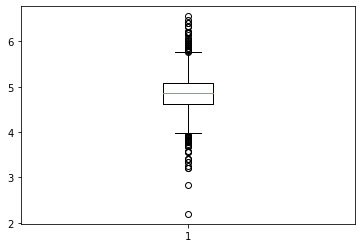

In [216]:
plt.boxplot(data['log_LoanAmount'])
plt.show()

In [217]:
print(data.log_LoanAmount.mean())
print(data.log_LoanAmount.median())


4.849017039931168
4.852030263919617


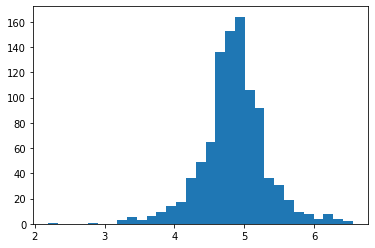

In [218]:
plt.hist(data['log_LoanAmount'],bins= int(bin_size))
plt.show()

Looks normal from above observations

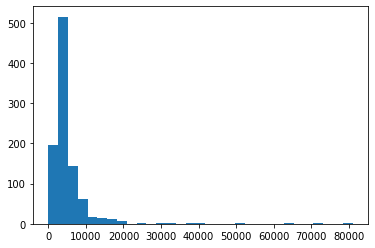

In [219]:
plt.hist(data['ApplicantIncome'],bins= int(bin_size))
plt.show()

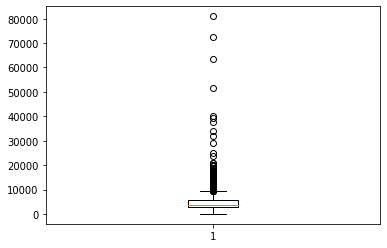

In [220]:
plt.boxplot(data['ApplicantIncome'])
plt.show()

In [0]:
data['log_ApplicantIncome']=np.log(data['ApplicantIncome']+10)

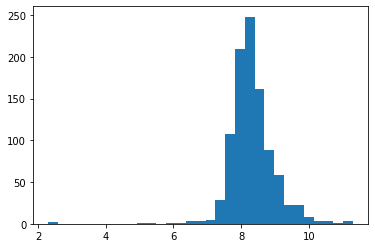

In [222]:
plt.hist(data['log_ApplicantIncome'],bins= int(bin_size))
plt.show()

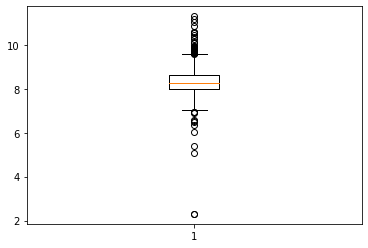

In [223]:
plt.boxplot(data['log_ApplicantIncome'])
plt.show()

In [224]:
print(data.log_LoanAmount.mean())
print(data.log_LoanAmount.median())


4.849017039931168
4.852030263919617


In [0]:
data['TotalIncome']=data['ApplicantIncome']+data['CoapplicantIncome']

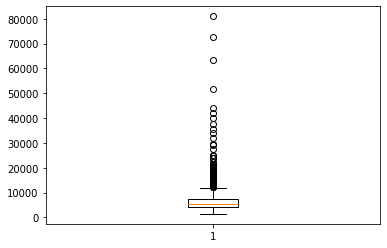

In [226]:
plt.boxplot(data['TotalIncome'])
plt.show()

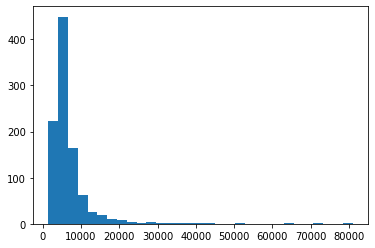

In [227]:
plt.hist(data['TotalIncome'],bins= int(bin_size))
plt.show()

In [0]:
data['log_TotalIncome']=np.log(data['TotalIncome'])

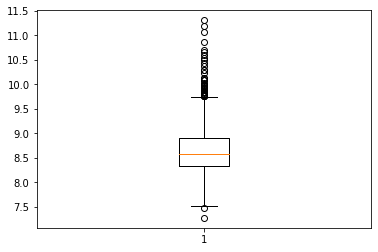

In [229]:
plt.boxplot(data['log_TotalIncome'])
plt.show()

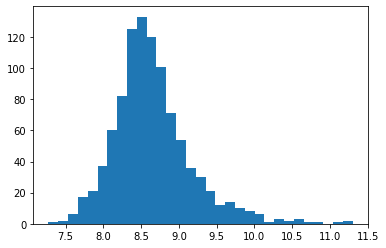

In [230]:
plt.hist(data['log_TotalIncome'],bins= int(bin_size))
plt.show()

In [231]:
print(data.log_TotalIncome.mean())
print(data.log_TotalIncome.median())


8.649903776343526
8.57810012631976


In [0]:
data['LoanAmountToTotalIncome']=data['LoanAmount']/data['TotalIncome']

In [0]:
data['LoanAmountToAppIncome']=data['ApplicantIncome']/data['LoanAmount']

In [0]:
data['LoanAmountToTotalIncome']=data['LoanAmountToTotalIncome'].astype(float)  
data['LoanAmountToAppIncome']=data['LoanAmountToAppIncome'].astype(float)
data['log_TotalIncome']=data['log_TotalIncome'].astype(float)
data['log_ApplicantIncome']=data['log_ApplicantIncome'].astype(float)
data['log_LoanAmount']=data['log_LoanAmount'].astype(float)

In [235]:
data.LoanAmountToAppIncome.min()

0.0

In [236]:
data.LoanAmountToTotalIncome.min()

0.0019047619047619048

In [237]:
data.Loan_ID.dtype

dtype('O')

In [0]:
var_mod = ['Self_Employed','Property_Area','Married','Gender','Education','Dependents']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [239]:
data['Loan_ID'] = data['Loan_ID'].map(lambda x: str(x)[2:])
data.Loan_ID.dtype

dtype('O')

In [240]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,log_ApplicantIncome,TotalIncome,log_TotalIncome,LoanAmountToTotalIncome,LoanAmountToAppIncome
0,001002,1,0,0,0,0,5849,0.0,142.51153,360.0,1.0,2,Y,4.959423,8.675734,5849.0,8.674026,0.024365,41.042293
1,001003,1,1,1,0,0,4583,1508.0,128.00000,360.0,1.0,0,N,4.852030,8.432289,6091.0,8.714568,0.021015,35.804688
2,001005,1,1,0,0,1,3000,0.0,66.00000,360.0,1.0,2,Y,4.189655,8.009695,3000.0,8.006368,0.022000,45.454545
3,001006,1,1,0,1,0,2583,2358.0,120.00000,360.0,1.0,2,Y,4.787492,7.860571,4941.0,8.505323,0.024287,21.525000
4,001008,1,0,0,0,0,6000,0.0,141.00000,360.0,1.0,2,Y,4.948760,8.701180,6000.0,8.699515,0.023500,42.553191


In [0]:
data.drop(['Loan_ID','LoanAmount', 'CoapplicantIncome','ApplicantIncome','Loan_Status'], axis=1, inplace=True)

In [242]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,log_LoanAmount,log_ApplicantIncome,TotalIncome,log_TotalIncome,LoanAmountToTotalIncome,LoanAmountToAppIncome
0,1,0,0,0,0,360.0,1.0,2,4.959423,8.675734,5849.0,8.674026,0.024365,41.042293
1,1,1,1,0,0,360.0,1.0,0,4.852030,8.432289,6091.0,8.714568,0.021015,35.804688
2,1,1,0,0,1,360.0,1.0,2,4.189655,8.009695,3000.0,8.006368,0.022000,45.454545
3,1,1,0,1,0,360.0,1.0,2,4.787492,7.860571,4941.0,8.505323,0.024287,21.525000
4,1,0,0,0,0,360.0,1.0,2,4.948760,8.701180,6000.0,8.699515,0.023500,42.553191


In [243]:
data.shape

(981, 14)

In [0]:
X=data.iloc[:614,:]
x_test=data.iloc[614:,:]

In [245]:
X.shape

(614, 14)

In [246]:
x_test.shape

(367, 14)

In [247]:
len(y)

614

In [248]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,log_LoanAmount,log_ApplicantIncome,TotalIncome,log_TotalIncome,LoanAmountToTotalIncome,LoanAmountToAppIncome
0,1,0,0,0,0,360.0,1.0,2,4.959423,8.675734,5849.0,8.674026,0.024365,41.042293
1,1,1,1,0,0,360.0,1.0,0,4.852030,8.432289,6091.0,8.714568,0.021015,35.804688
2,1,1,0,0,1,360.0,1.0,2,4.189655,8.009695,3000.0,8.006368,0.022000,45.454545
3,1,1,0,1,0,360.0,1.0,2,4.787492,7.860571,4941.0,8.505323,0.024287,21.525000
4,1,0,0,0,0,360.0,1.0,2,4.948760,8.701180,6000.0,8.699515,0.023500,42.553191


In [0]:
rf=RandomForestClassifier()

In [250]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
predict_rf=rf.predict(x_test)

In [0]:
pred_df=pd.DataFrame(predict_rf)
pred_df.to_csv('new.csv')

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict_rf)

0.8048780487804879

In [0]:
param_grid = {
              "n_estimators": [10,20,30,40,50,60,70,80,100,],
              "max_features": [10,11,12,13,14,15],

    
             }

In [0]:
from sklearn.model_selection import GridSearchCV
grid_rf = GridSearchCV(rf, param_grid=param_grid)

In [256]:
model=grid_rf.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this t

In [257]:
grid_rf

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [0]:
predict_grid_rf=grid_rf.predict(x_test)

In [0]:
pred_df=pd.DataFrame(predict_grid_rf)
pred_df.to_csv('new1.csv')

In [0]:
accuracy_score(y_test,predict_grid_rf)

0.8373983739837398